In [8]:
import numpy as np
import os
import librosa
import keras
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [45]:
# load the BirdNET model; embedding_model will the model minus the last layer, 
# providing an embedding into a 1024-dimensional vector space
# the warnings come from the way the model was saved and can be ignored
model_path = 'BirdNET-Analyzer/checkpoints/V2.3/BirdNET_GLOBAL_3K_V2.3_Model'
model = keras.models.load_model(model_path, compile=False).model
model_input = keras.Model(inputs = model.input, outputs = model.get_layer('CONV_0').output)
model_output = keras.Model(inputs = model.get_layer('POST_CONV_1').input, outputs = model.output)
embedding_model = keras.Model(inputs = model.get_layer('POST_CONV_1').input, outputs = model.get_layer('CONCAT_DO').output)

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: <keras.layers.convolutional.conv2d.Conv2D object at 0x7f5c94ce7f50>

In [13]:
import visualkeras
from ann_visualizer.visualize import ann_viz


In [11]:
ann_viz(model, view=True, filename= 'construct_model', title='CNN — Model 1 — Simple Architecture')

ValueError: invalid literal for int() with base 10: '144000)'

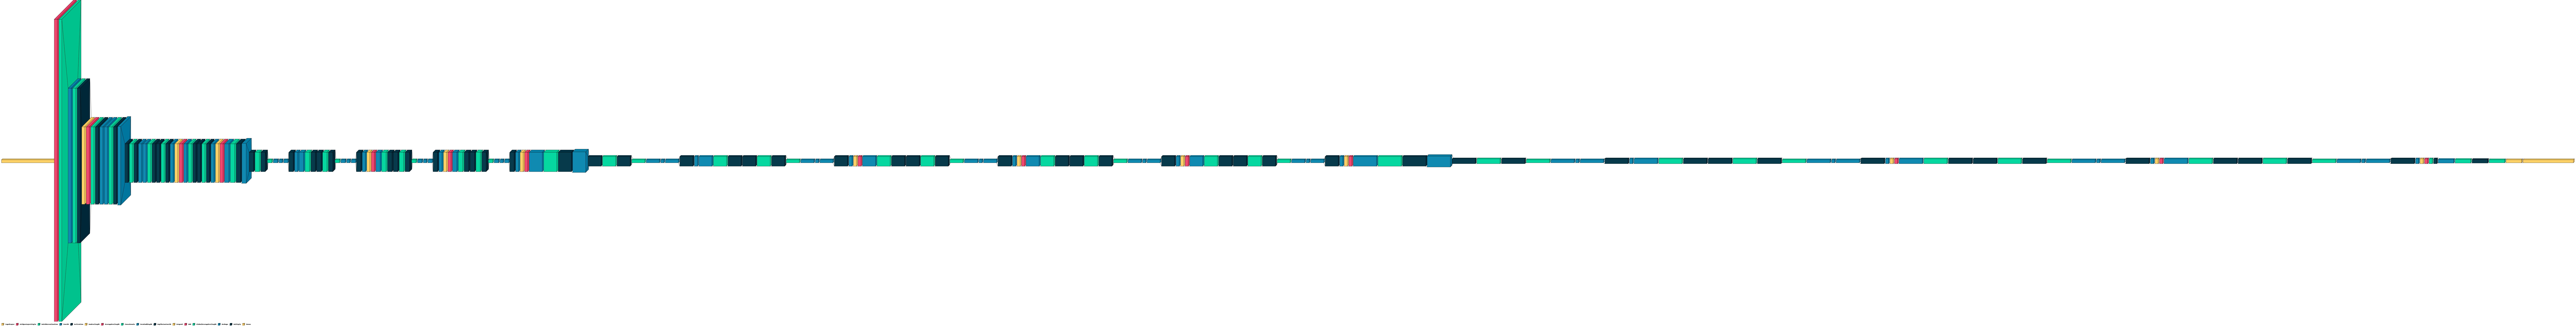

In [14]:
visualkeras.layered_view(model, legend=True)

In [17]:
!pip install plot_model

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model_input, to_file='model.png', show_shapes=False, show_layer_names=False, expand_nested=False)


NameError: name 'model_input' is not defined

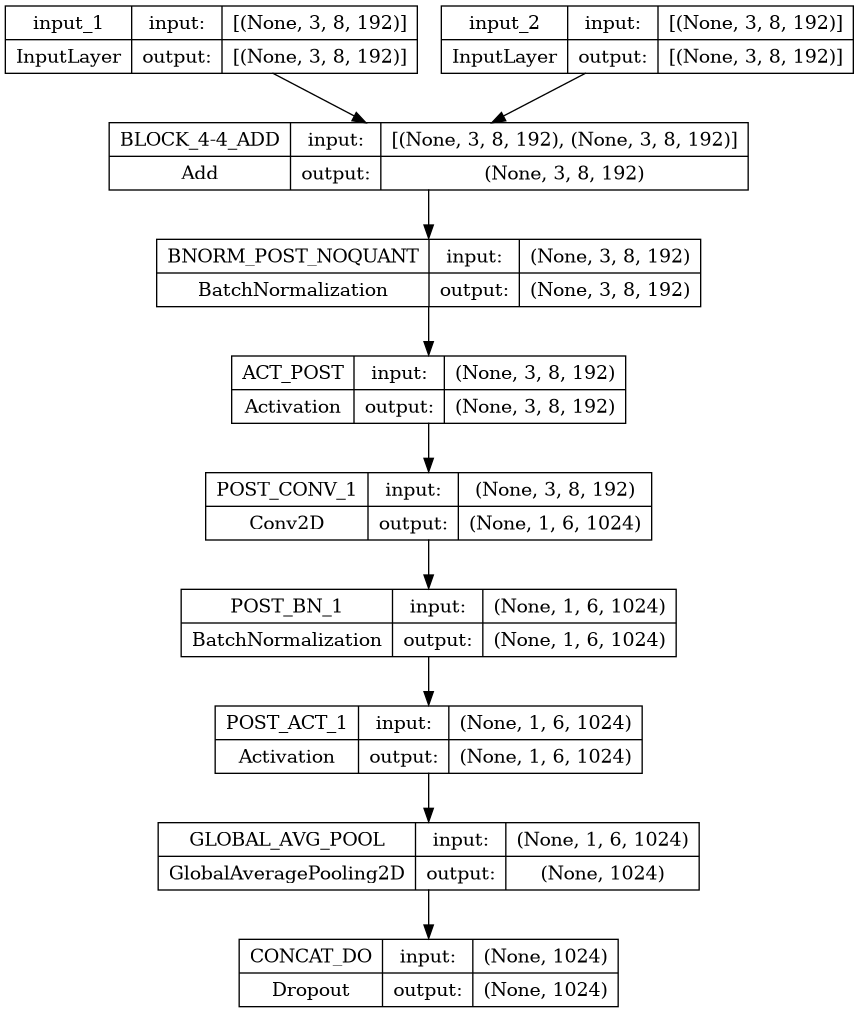

In [19]:
plot_model(embedding_model, to_file='model.png', show_shapes=True, show_layer_names=True, expand_nested=True)


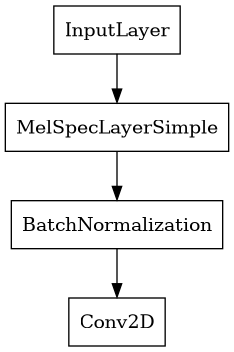

In [48]:
plot_model(model_input, to_file='model_input.png', show_shapes=False, show_layer_names=False, expand_nested=False)


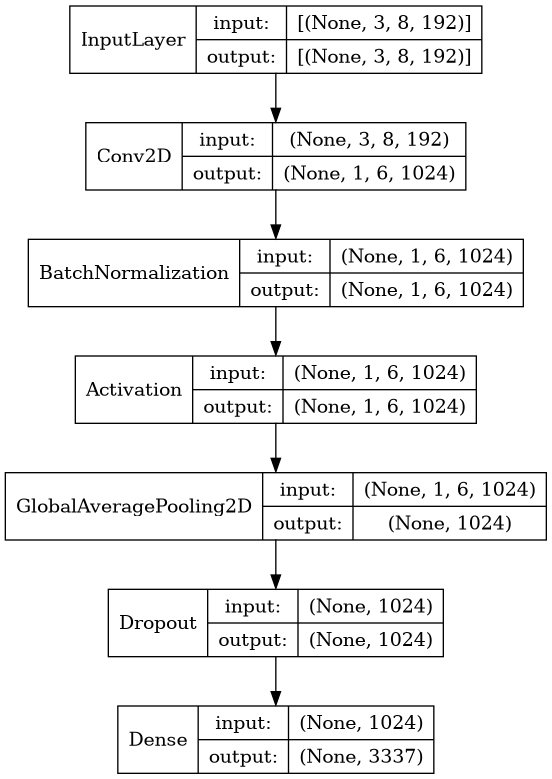

In [44]:
plot_model(model_output, to_file='model_output.png', show_shapes=True, show_layer_names=False, expand_nested=False)


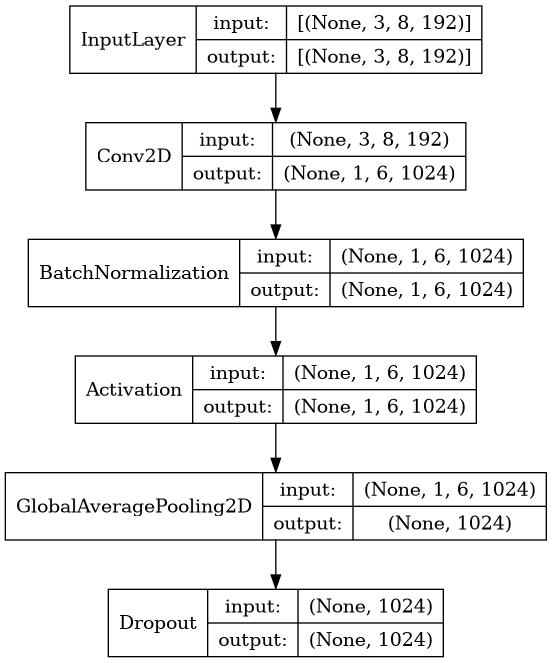

In [47]:
plot_model(embedding_model, to_file='embedding_model.png', show_shapes=True, show_layer_names=False, expand_nested=False)


In [2]:

def construct_model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
model=construct_model()

NameError: name 'Sequential' is not defined